# Wild fires  

This jupyter book examines the exported databricks data from MS-SQL. It can edit, manipulate and, most importantly, examine them.

info:
loehnertz@space4environment.com

## (0) Connect to JEDI - AZURE ( in the Moment running wiht FME)  -- under construction

In [1]:
##https://stackoverflow.com/questions/65649972/azure-python-download-storage-blob-returns-the-condition-specified-using-http-c
##https://learn.microsoft.com/en-us/azure/storage/blobs/storage-blob-download-python


jedi_dim =r"https://cwsblobstorage01.blob.core.windows.net/cwsblob01/ExportTable/wildfires/wildfires_ctable_v4/part-00000-tid-1223419340435827572-52b7c921-64fe-406c-8a0c-18b9fa6d9a5f-975-1-c000.csv.gz"




## (1) Connect to data from MS-SQL ONAGER server - [ETC_ULS_Sandbox]

The following box connect to MS-SQL ONAGER server 

In [2]:
import pyodbc 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Some other example server values are
conn = pyodbc.connect('Driver={SQL Server};'
                        'Server=ONAGER;'
                        'Database=ETC_ULS_Sandbox;'
                        'UID=user1;'
                        'PWD=uSer1Pass!;'
                        'Trusted_Connection=yes;')
#
print ("connected to ETC_ULS_Sandbox......")

connected to ETC_ULS_Sandbox......


In [3]:

## Testing connection to GreenMonkey sever:

import pyodbc 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlalchemy as sa
from sqlalchemy import create_engine, event
from sqlalchemy.engine.url import URL

        

print ("connect to engine......")
engine = sa.create_engine('mssql+pyodbc://' + "GREENMONKEy" + '/' + "Climate_Impact" + '?trusted_connection=yes&driver=ODBC+Driver+13+for+SQL+Server')

print ("connection to greenmonkey found")
print ("Reading table from greenmonkey")
query=('''

SELECT [SCHANG]
      ,[LCF3]
      ,[LCF2]
      ,[LCF1]
      ,[LCFL3]
      ,[LCFL2]
      ,[LCFL1]
      ,[CHANGE]
      ,[GRIDCODE]
      ,[CC]
      ,[GCHA]
      ,[lcf3_num]
      ,[Cng_n]
      ,[LTAKE]
      ,[INV_LTAKE]
      ,[LTAKE_ALL]
      ,[LD_code]
      ,[LD_description]
      ,[SOC_factor]
  FROM [Climate_Impact].[LUT].[LCF]
''')  
df_test = pd.read_sql(query, engine)
print(df_test.head(26))
#pivot 

print ("end.............greenmonkey")

connect to engine......
connection to greenmonkey found
Reading table from greenmonkey
    SCHANG    LCF3   LCF2  LCF1  \
0   132133   lcf12  lcf12  lcf1   
1   133323  lcf911  lcf91  lcf9   
2   142121   lcf11  lcf11  lcf1   
3   111142   lcf38  lcf38  lcf3   
4   112324   lcf63  lcf63  lcf6   
5   122111   lcf12  lcf12  lcf1   
6   123243   lcf54  lcf54  lcf5   
7   124412   lcf99  lcf99  lcf9   
8   132141   lcf13  lcf13  lcf1   
9   133324   lcf63  lcf63  lcf6   
10  142122   lcf11  lcf11  lcf1   
11  111211   lcf54  lcf54  lcf5   
12  112331  lcf911  lcf91  lcf9   
13  122112   lcf12  lcf12  lcf1   
14  123244   lcf54  lcf54  lcf5   
15  124421   lcf99  lcf99  lcf9   
16  132142   lcf38  lcf38  lcf3   
17  133331  lcf911  lcf91  lcf9   
18  142123   lcf11  lcf11  lcf1   
19  111212   lcf54  lcf54  lcf5   
20  123411   lcf99  lcf99  lcf9   
21  131124   lcf12  lcf12  lcf1   
22  132312   lcf63  lcf63  lcf6   
23  133522  lcf931  lcf93  lcf9   
24  142231   lcf54  lcf54  lcf5   
25 

## (2) Reading data

### (2.1) Reading the "mother" database

In [4]:
##Reading data
#cursor = cnxn.cursor()
### SQL query
print ("Reading table from ONAGER")
query=('''

SELECT [wild_fires_20002022_v4_mother].[ADM_ID]
      ,[ProtArea]
      ,[envZones]
      ,[clc0018]
      ,[GridNum10km],
         ISNULL(SUM( [y01012000]),0 ) AS [01-01-2000],
		 ISNULL(SUM( [y01022000]),0 ) AS [01-02-2000],
		ISNULL(SUM( [y01032000]),0 ) AS [01-03-2000],
		ISNULL(SUM( [y01042000]),0 ) AS [01-04-2000],
		ISNULL(SUM( [y01052000]),0 ) AS [01-05-2000],
		ISNULL(SUM( [y01062000]),0 ) AS [01-06-2000],
		ISNULL(SUM( [y01072000]),0 ) AS [01-07-2000],
		ISNULL(SUM( [y01082000]),0 ) AS [01-08-2000],
		ISNULL(SUM( [y01092000]),0 ) AS [01-09-2000],
		ISNULL(SUM( [y01102000]),0 ) AS [01-10-2000],
		ISNULL(SUM( [y01112000]),0 ) AS [01-11-2000],
		ISNULL(SUM( [y01122000]),0 ) AS [01-12-2000],


        ISNULL(SUM( [y01012001]),0 ) AS [01-01-2001],
		ISNULL(SUM( [y01022001]),0 ) AS [01-02-2001],
		ISNULL(SUM( [y01032001]),0 ) AS [01-03-2001],
		ISNULL(SUM( [y01042001]),0 ) AS [01-04-2001],
		ISNULL(SUM( [y01052001]),0 ) AS [01-05-2001],
		ISNULL(SUM( [y01062001]),0 ) AS [01-06-2001],
		ISNULL(SUM( [y01072001]),0 ) AS [01-07-2001],
		ISNULL(SUM( [y01082001]),0 ) AS [01-08-2001],
		ISNULL(SUM( [y01092001]),0 ) AS [01-09-2001],
		ISNULL(SUM( [y01102001]),0 ) AS [01-10-2001],
		ISNULL(SUM( [y01112001]),0 ) AS [01-11-2001],
		ISNULL(SUM( [y01122001]),0 ) AS [01-12-2001],


        ISNULL(SUM( [y01012002]),0 ) AS [01-01-2002],
		ISNULL(SUM( [y01022002]),0 ) AS [01-02-2002],
		ISNULL(SUM( [y01032002]),0 ) AS [01-03-2002],
		ISNULL(SUM( [y01042002]),0 ) AS [01-04-2002],
		ISNULL(SUM( [y01052002]),0 ) AS [01-05-2002],
		ISNULL(SUM( [y01062002]),0 ) AS [01-06-2002],
		ISNULL(SUM( [y01072002]),0 ) AS [01-07-2002],
		ISNULL(SUM( [y01082002]),0 ) AS [01-08-2002],
		ISNULL(SUM( [y01092002]),0 ) AS [01-09-2002],
		ISNULL(SUM( [y01102002]),0 ) AS [01-10-2002],
		ISNULL(SUM( [y01112002]),0 ) AS [01-11-2002],
		ISNULL(SUM( [y01122002]),0 ) AS [01-12-2002],


        ISNULL(SUM( [y01012003]),0 ) AS [01-01-2003],
		ISNULL(SUM( [y01022003]),0 ) AS [01-02-2003],
		ISNULL(SUM( [y01032003]),0 ) AS [01-03-2003],
		ISNULL(SUM( [y01042003]),0 ) AS [01-04-2003],
		ISNULL(SUM( [y01052003]),0 ) AS [01-05-2003],
		ISNULL(SUM( [y01062003]),0 ) AS [01-06-2003],
		ISNULL(SUM( [y01072003]),0 ) AS [01-07-2003],
		ISNULL(SUM( [y01082003]),0 ) AS [01-08-2003],
		ISNULL(SUM( [y01092003]),0 ) AS [01-09-2003],
		ISNULL(SUM( [y01102003]),0 ) AS [01-10-2003],
		ISNULL(SUM( [y01112003]),0 ) AS [01-11-2003],
		ISNULL(SUM( [y01122003]),0 ) AS [01-12-2003],


        ISNULL(SUM( [y01012004]),0 ) AS [01-01-2004],
		ISNULL(SUM( [y01022004]),0 ) AS [01-02-2004],
		ISNULL(SUM( [y01032004]),0 ) AS [01-03-2004],
		ISNULL(SUM( [y01042004]),0 ) AS [01-04-2004],
		ISNULL(SUM( [y01052004]),0 ) AS [01-05-2004],
		ISNULL(SUM( [y01062004]),0 ) AS [01-06-2004],
		ISNULL(SUM( [y01072004]),0 ) AS [01-07-2004],
		ISNULL(SUM( [y01082004]),0 ) AS [01-08-2004],
		ISNULL(SUM( [y01092004]),0 ) AS [01-09-2004],
		ISNULL(SUM( [y01102004]),0 ) AS [01-10-2004],
		ISNULL(SUM( [y01112004]),0 ) AS [01-11-2004],
		ISNULL(SUM( [y01122004]),0 ) AS [01-12-2004],


        ISNULL(SUM( [y01012005]),0 ) AS [01-01-2005],
		ISNULL(SUM( [y01022005]),0 ) AS [01-02-2005],
		ISNULL(SUM( [y01032005]),0 ) AS [01-03-2005],
		ISNULL(SUM( [y01042005]),0 ) AS [01-04-2005],
		ISNULL(SUM( [y01052005]),0 ) AS [01-05-2005],
		ISNULL(SUM( [y01062005]),0 ) AS [01-06-2005],
		ISNULL(SUM( [y01072005]),0 ) AS [01-07-2005],
		ISNULL(SUM( [y01082005]),0 ) AS [01-08-2005],
		ISNULL(SUM( [y01092005]),0 ) AS [01-09-2005],
		ISNULL(SUM( [y01102005]),0 ) AS [01-10-2005],
		ISNULL(SUM( [y01112005]),0 ) AS [01-11-2005],
		ISNULL(SUM( [y01122005]),0 ) AS [01-12-2005],



        ISNULL(SUM( [y01012006]),0 ) AS [01-01-2006],
        ISNULL(SUM( [y01022006]),0 ) AS [01-02-2006],
        ISNULL(SUM( [y01032006]),0 ) AS [01-03-2006],
        ISNULL(SUM( [y01042006]),0 ) AS [01-04-2006],
        ISNULL(SUM( [y01052006]),0 ) AS [01-05-2006],
        ISNULL(SUM( [y01062006]),0 ) AS [01-06-2006],
        ISNULL(SUM( [y01072006]),0 ) AS [01-07-2006],
        ISNULL(SUM( [y01082006]),0 ) AS [01-08-2006],
        ISNULL(SUM( [y01092006]),0 ) AS [01-09-2006],
        ISNULL(SUM( [y01102006]),0 ) AS [01-10-2006],
        ISNULL(SUM( [y01112006]),0 ) AS [01-11-2006],
        ISNULL(SUM( [y01122006]),0 ) AS [01-12-2006],
        ISNULL(SUM( [y01012007]),0 ) AS [01-01-2007],
        ISNULL(SUM( [y01022007]),0 ) AS [01-02-2007],
        ISNULL(SUM( [y01032007]),0 ) AS [01-03-2007],
        ISNULL(SUM( [y01042007]),0 ) AS [01-04-2007],
        ISNULL(SUM( [y01052007]),0 ) AS [01-05-2007],
        ISNULL(SUM( [y01062007]),0 ) AS [01-06-2007],
        ISNULL(SUM( [y01072007]),0 ) AS [01-07-2007],
        ISNULL(SUM( [y01082007]),0 ) AS [01-08-2007],
        ISNULL(SUM( [y01092007]),0 ) AS [01-09-2007],
        ISNULL(SUM( [y01102007]),0 ) AS [01-10-2007],
        ISNULL(SUM( [y01112007]),0 ) AS [01-11-2007],
        ISNULL(SUM( [y01122007]),0 ) AS [01-12-2007],
        ISNULL(SUM( [y01012008]),0 ) AS [01-01-2008],
        ISNULL(SUM( [y01022008]),0 ) AS [01-02-2008],
        ISNULL(SUM( [y01032008]),0 ) AS [01-03-2008],
        ISNULL(SUM( [y01042008]),0 ) AS [01-04-2008],
        ISNULL(SUM( [y01052008]),0 ) AS [01-05-2008],
        ISNULL(SUM( [y01062008]),0 ) AS [01-06-2008],
        ISNULL(SUM( [y01072008]),0 ) AS [01-07-2008],
        ISNULL(SUM( [y01082008]),0 ) AS [01-08-2008],
        ISNULL(SUM( [y01092008]),0 ) AS [01-09-2008],
        ISNULL(SUM( [y01102008]),0 ) AS [01-10-2008],
        ISNULL(SUM( [y01112008]),0 ) AS [01-11-2008],
        ISNULL(SUM( [y01122008]),0 ) AS [01-12-2008],
        ISNULL(SUM( [y01012009]),0 ) AS [01-01-2009],
        ISNULL(SUM( [y01022009]),0 ) AS [01-02-2009],
        ISNULL(SUM( [y01032009]),0 ) AS [01-03-2009],
        ISNULL(SUM( [y01042009]),0 ) AS [01-04-2009],
        ISNULL(SUM( [y01052009]),0 ) AS [01-05-2009],
        ISNULL(SUM( [y01062009]),0 ) AS [01-06-2009],
        ISNULL(SUM( [y01072009]),0 ) AS [01-07-2009],
        ISNULL(SUM( [y01082009]),0 ) AS [01-08-2009],
        ISNULL(SUM( [y01092009]),0 ) AS [01-09-2009],
        ISNULL(SUM( [y01102009]),0 ) AS [01-10-2009],
        ISNULL(SUM( [y01112009]),0 ) AS [01-11-2009],
        ISNULL(SUM( [y01122009]),0 ) AS [01-12-2009],
        ISNULL(SUM( [y01012010]),0 ) AS [01-01-2010],
        ISNULL(SUM( [y01022010]),0 ) AS [01-02-2010],
        ISNULL(SUM( [y01032010]),0 ) AS [01-03-2010],
        ISNULL(SUM( [y01042010]),0 ) AS [01-04-2010],
        ISNULL(SUM( [y01052010]),0 ) AS [01-05-2010],
        ISNULL(SUM( [y01062010]),0 ) AS [01-06-2010],
        ISNULL(SUM( [y01072010]),0 ) AS [01-07-2010],
        ISNULL(SUM( [y01082010]),0 ) AS [01-08-2010],
        ISNULL(SUM( [y01092010]),0 ) AS [01-09-2010],
        ISNULL(SUM( [y01102010]),0 ) AS [01-10-2010],
        ISNULL(SUM( [y01112010]),0 ) AS [01-11-2010],
        ISNULL(SUM( [y01122010]),0 ) AS [01-12-2010],
        ISNULL(SUM( [y01012011]),0 ) AS [01-01-2011],
        ISNULL(SUM( [y01022011]),0 ) AS [01-02-2011],
        ISNULL(SUM( [y01032011]),0 ) AS [01-03-2011],
        ISNULL(SUM( [y01042011]),0 ) AS [01-04-2011],
        ISNULL(SUM( [y01052011]),0 ) AS [01-05-2011],
        ISNULL(SUM( [y01062011]),0 ) AS [01-06-2011],
        ISNULL(SUM( [y01072011]),0 ) AS [01-07-2011],
        ISNULL(SUM( [y01082011]),0 ) AS [01-08-2011],
        ISNULL(SUM( [y01092011]),0 ) AS [01-09-2011],
        ISNULL(SUM( [y01102011]),0 ) AS [01-10-2011],
        ISNULL(SUM( [y01112011]),0 ) AS [01-11-2011],
        ISNULL(SUM( [y01122011]),0 ) AS [01-12-2011],
        ISNULL(SUM( [y01012012]),0 ) AS [01-01-2012],
        ISNULL(SUM( [y01022012]),0 ) AS [01-02-2012],
        ISNULL(SUM( [y01032012]),0 ) AS [01-03-2012],
        ISNULL(SUM( [y01042012]),0 ) AS [01-04-2012],
        ISNULL(SUM( [y01052012]),0 ) AS [01-05-2012],
        ISNULL(SUM( [y01062012]),0 ) AS [01-06-2012],
        ISNULL(SUM( [y01072012]),0 ) AS [01-07-2012],
        ISNULL(SUM( [y01082012]),0 ) AS [01-08-2012],
        ISNULL(SUM( [y01092012]),0 ) AS [01-09-2012],
        ISNULL(SUM( [y01102012]),0 ) AS [01-10-2012],
        ISNULL(SUM( [y01112012]),0 ) AS [01-11-2012],
        ISNULL(SUM( [y01122012]),0 ) AS [01-12-2012],
        ISNULL(SUM( [y01012013]),0 ) AS [01-01-2013],
        ISNULL(SUM( [y01022013]),0 ) AS [01-02-2013],
        ISNULL(SUM( [y01032013]),0 ) AS [01-03-2013],
        ISNULL(SUM( [y01042013]),0 ) AS [01-04-2013],
        ISNULL(SUM( [y01052013]),0 ) AS [01-05-2013],
        ISNULL(SUM( [y01062013]),0 ) AS [01-06-2013],
        ISNULL(SUM( [y01072013]),0 ) AS [01-07-2013],
        ISNULL(SUM( [y01082013]),0 ) AS [01-08-2013],
        ISNULL(SUM( [y01092013]),0 ) AS [01-09-2013],
        ISNULL(SUM( [y01102013]),0 ) AS [01-10-2013],
        ISNULL(SUM( [y01112013]),0 ) AS [01-11-2013],
        ISNULL(SUM( [y01122013]),0 ) AS [01-12-2013],
        ISNULL(SUM( [y01012014]),0 ) AS [01-01-2014],
        ISNULL(SUM( [y01022014]),0 ) AS [01-02-2014],
        ISNULL(SUM( [y01032014]),0 ) AS [01-03-2014],
        ISNULL(SUM( [y01042014]),0 ) AS [01-04-2014],
        ISNULL(SUM( [y01052014]),0 ) AS [01-05-2014],
        ISNULL(SUM( [y01062014]),0 ) AS [01-06-2014],
        ISNULL(SUM( [y01072014]),0 ) AS [01-07-2014],
        ISNULL(SUM( [y01082014]),0 ) AS [01-08-2014],
        ISNULL(SUM( [y01092014]),0 ) AS [01-09-2014],
        ISNULL(SUM( [y01102014]),0 ) AS [01-10-2014],
        ISNULL(SUM( [y01112014]),0 ) AS [01-11-2014],
        ISNULL(SUM( [y01122014]),0 ) AS [01-12-2014],
        ISNULL(SUM( [y01012015]),0 ) AS [01-01-2015],
        ISNULL(SUM( [y01022015]),0 ) AS [01-02-2015],
        ISNULL(SUM( [y01032015]),0 ) AS [01-03-2015],
        ISNULL(SUM( [y01042015]),0 ) AS [01-04-2015],
        ISNULL(SUM( [y01052015]),0 ) AS [01-05-2015],
        ISNULL(SUM( [y01062015]),0 ) AS [01-06-2015],
        ISNULL(SUM( [y01072015]),0 ) AS [01-07-2015],
        ISNULL(SUM( [y01082015]),0 ) AS [01-08-2015],
        ISNULL(SUM( [y01092015]),0 ) AS [01-09-2015],
        ISNULL(SUM( [y01102015]),0 ) AS [01-10-2015],
        ISNULL(SUM( [y01112015]),0 ) AS [01-11-2015],
        ISNULL(SUM( [y01122015]),0 ) AS [01-12-2015],
        ISNULL(SUM( [y01012016]),0 ) AS [01-01-2016],
        ISNULL(SUM( [y01022016]),0 ) AS [01-02-2016],
        ISNULL(SUM( [y01032016]),0 ) AS [01-03-2016],
        ISNULL(SUM( [y01042016]),0 ) AS [01-04-2016],
        ISNULL(SUM( [y01052016]),0 ) AS [01-05-2016],
        ISNULL(SUM( [y01062016]),0 ) AS [01-06-2016],
        ISNULL(SUM( [y01072016]),0 ) AS [01-07-2016],
        ISNULL(SUM( [y01082016]),0 ) AS [01-08-2016],
        ISNULL(SUM( [y01092016]),0 ) AS [01-09-2016],
        ISNULL(SUM( [y01102016]),0 ) AS [01-10-2016],
        ISNULL(SUM( [y01112016]),0 ) AS [01-11-2016],
        ISNULL(SUM( [y01122016]),0 ) AS [01-12-2016],
        ISNULL(SUM( [y01012017]),0 ) AS [01-01-2017],
        ISNULL(SUM( [y01022017]),0 ) AS [01-02-2017],
        ISNULL(SUM( [y01032017]),0 ) AS [01-03-2017],
        ISNULL(SUM( [y01042017]),0 ) AS [01-04-2017],
        ISNULL(SUM( [y01052017]),0 ) AS [01-05-2017],
        ISNULL(SUM( [y01062017]),0 ) AS [01-06-2017],
        ISNULL(SUM( [y01072017]),0 ) AS [01-07-2017],
        ISNULL(SUM( [y01082017]),0 ) AS [01-08-2017],
        ISNULL(SUM( [y01092017]),0 ) AS [01-09-2017],
        ISNULL(SUM( [y01102017]),0 ) AS [01-10-2017],
        ISNULL(SUM( [y01112017]),0 ) AS [01-11-2017],
        ISNULL(SUM( [y01122017]),0 ) AS [01-12-2017],
        ISNULL(SUM( [y01012018]),0 ) AS [01-01-2018],
        ISNULL(SUM( [y01022018]),0 ) AS [01-02-2018],
        ISNULL(SUM( [y01032018]),0 ) AS [01-03-2018],
        ISNULL(SUM( [y01042018]),0 ) AS [01-04-2018],
        ISNULL(SUM( [y01052018]),0 ) AS [01-05-2018],
        ISNULL(SUM( [y01062018]),0 ) AS [01-06-2018],
        ISNULL(SUM( [y01072018]),0 ) AS [01-07-2018],
        ISNULL(SUM( [y01082018]),0 ) AS [01-08-2018],
        ISNULL(SUM( [y01092018]),0 ) AS [01-09-2018],
        ISNULL(SUM( [y01102018]),0 ) AS [01-10-2018],
        ISNULL(SUM( [y01112018]),0 ) AS [01-11-2018],
        ISNULL(SUM( [y01122018]),0 ) AS [01-12-2018],
        ISNULL(SUM( [y01012019]),0 ) AS [01-01-2019],
        ISNULL(SUM( [y01022019]),0 ) AS [01-02-2019],
        ISNULL(SUM( [y01032019]),0 ) AS [01-03-2019],
        ISNULL(SUM( [y01042019]),0 ) AS [01-04-2019],
        ISNULL(SUM( [y01052019]),0 ) AS [01-05-2019],
        ISNULL(SUM( [y01062019]),0 ) AS [01-06-2019],
        ISNULL(SUM( [y01072019]),0 ) AS [01-07-2019],
        ISNULL(SUM( [y01082019]),0 ) AS [01-08-2019],
        ISNULL(SUM( [y01092019]),0 ) AS [01-09-2019],
        ISNULL(SUM( [y01102019]),0 ) AS [01-10-2019],
        ISNULL(SUM( [y01112019]),0 ) AS [01-11-2019],
        ISNULL(SUM( [y01122019]),0 ) AS [01-12-2019],
        ISNULL(SUM( [y01012020]),0 ) AS [01-01-2020],
        ISNULL(SUM( [y01022020]),0 ) AS [01-02-2020],
        ISNULL(SUM( [y01032020]),0 ) AS [01-03-2020],
        ISNULL(SUM( [y01042020]),0 ) AS [01-04-2020],
        ISNULL(SUM( [y01052020]),0 ) AS [01-05-2020],
        ISNULL(SUM( [y01062020]),0 ) AS [01-06-2020],
        ISNULL(SUM( [y01072020]),0 ) AS [01-07-2020],
        ISNULL(SUM( [y01082020]),0 ) AS [01-08-2020],
        ISNULL(SUM( [y01092020]),0 ) AS [01-09-2020],
        ISNULL(SUM( [y01102020]),0 ) AS [01-10-2020],
        ISNULL(SUM( [y01112020]),0 ) AS [01-11-2020],
        ISNULL(SUM( [y01122020]),0 ) AS [01-12-2020],
        ISNULL(SUM( [y01012021]),0 ) AS [01-01-2021],
        ISNULL(SUM( [y01022021]),0 ) AS [01-02-2021],
        ISNULL(SUM( [y01032021]),0 ) AS [01-03-2021],
        ISNULL(SUM( [y01042021]),0 ) AS [01-04-2021],
        ISNULL(SUM( [y01052021]),0 ) AS [01-05-2021],
        ISNULL(SUM( [y01062021]),0 ) AS [01-06-2021],
        ISNULL(SUM( [y01072021]),0 ) AS [01-07-2021],
        ISNULL(SUM( [y01082021]),0 ) AS [01-08-2021],
        ISNULL(SUM( [y01092021]),0 ) AS [01-09-2021],
        ISNULL(SUM( [y01102021]),0 ) AS [01-10-2021],
        ISNULL(SUM( [y01112021]),0 ) AS [01-11-2021],
        ISNULL(SUM( [y01122021]),0 ) AS [01-12-2021],
        ISNULL(SUM( [y01012022]),0 ) AS [01-01-2022],
        ISNULL(SUM( [y01022022]),0 ) AS [01-02-2022],
        ISNULL(SUM( [y01032022]),0 ) AS [01-03-2022],
        ISNULL(SUM( [y01042022]),0 ) AS [01-04-2022],
        ISNULL(SUM( [y01052022]),0 ) AS [01-05-2022],
        ISNULL(SUM( [y01062022]),0 ) AS [01-06-2022],
        ISNULL(SUM( [y01072022]),0 ) AS [01-07-2022],
        ISNULL(SUM( [y01082022]),0 ) AS [01-08-2022],
        ISNULL(SUM( [y01092022]),0 ) AS [01-09-2022],
        ISNULL(SUM( [y01102022]),0 ) AS [01-10-2022],
        ISNULL(SUM( [y01112022]),0 ) AS [01-11-2022],
        ISNULL(SUM( [y01122022]),0 ) AS [01-12-2022],
        ISNULL( SUM([AreaHa]), 0 ) as Mapped_AreaHa
  FROM [Climate_Impact].[wild_fire].[wild_fires_20002022_v4_mother]

  left JOIN [LUT].[L_adm_eea39_2021LUT] ON
   [wild_fires_20002022_v4_mother].ADM_ID= [LUT].[L_adm_eea39_2021LUT].ADM_ID

   where [wild_fires_20002022_v4_mother].ADM_ID >=0
  
  group by 
  [wild_fires_20002022_v4_mother].ADM_ID,
    [ProtArea],
    [clc0018],
    [GridNum10km],
    envZones
''')
print ("connect to engine......")
engine = sa.create_engine('mssql+pyodbc://' + "GREENMONKEy" + '/' + "Climate_Impact" + '?trusted_connection=yes&driver=ODBC+Driver+13+for+SQL+Server')
df = pd.read_sql(query, engine)
#print(df.head(26))
#pivot 

print ("end.............you can use the imported mother table for calculation or transforming...")

Reading table from ONAGER
connect to engine......
end.............you can use the imported mother table for calculation or transforming...


In [5]:
# checking the new data
print ('The readed table has folloing shape:..........................................')
count_row = df.shape[0]  # Gives number of rows
count_col = df.shape[1]  # Gives number of columns

print ('number of rows: ' + str(count_row))
print ('number of columns: ' + str(count_col))
print ('Subset and schema of the dataframe (df):.....................................')
df

The readed table has folloing shape:..........................................
number of rows: 1680494
number of columns: 282
Subset and schema of the dataframe (df):.....................................


,ADM_ID,ProtArea,envZones,clc0018,GridNum10km,01-01-2000,01-02-2000,01-03-2000,01-04-2000,01-05-2000,...,01-04-2022,01-05-2022,01-06-2022,01-07-2022,01-08-2022,01-09-2022,01-10-2022,01-11-2022,01-12-2022,Mapped_AreaHa
0,306,NaN,Mediterranean North,243243,2.286237e+16,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,577.0
1,1457,11.0,Mediterranean Mountains,242242,1.420061e+16,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,33.0
2,388,1.0,Boreal,313313,2.365291e+16,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,55.0
3,595,11.0,Mediterranean North,243243,1.865041e+16,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.0
4,1500,10.0,Mediterranean North,142142,2.308255e+16,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1680489,454,NaN,Mediterranean North,112112,1.418316e+16,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,60.0
1680490,757,NaN,Continental,411231,2.312550e+16,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,14.0
1680491,366,NaN,Mediterranean South,242242,9.436662e+15,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,184.0
1680492,424,NaN,Atlantic Central,324324,1.858623e+16,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,91.0


### (2.2) Reading smaller tables 

In [6]:
##

## (3) Plot data using PANDA

In [7]:
##

## (4) Transform tabel column to row using pandas:

### (4.1 ) Transform mother table column to row using pandas:

In [8]:
### transform table:
df_transformed =df.melt(id_vars=["ProtArea", "ADM_ID","clc0018","envZones","GridNum10km","Mapped_AreaHa"], 
     var_name="fire_date", 
        value_name="burned_area")




##Convert the Strings to Datetime in the DataFrame
#df_transformed['fire_date'] = pd.to_datetime(df_transformed['fire_date'], format='%d-%m-%Y')
df_transformed['fire_date'] = pd.to_datetime(df_transformed['fire_date'], format='%d-%m-%Y')
#df_transformed['fire_date'] = pd.to_datetime(df_transformed['fire_date'])
df_transformed

count_row = df_transformed.shape[0]  # Gives number of rows
count_col = df_transformed.shape[1]  # Gives number of columns

print ('number of rows: ' + str(count_row))
print ('number of columns: ' + str(count_col))
print ("done")


number of rows: 463816344
number of columns: 8
done


Removing all rows without burned areas:

In [9]:
### remove all rows without burned areas:!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
df_transformed_light = df_transformed.loc[(df_transformed['burned_area'] >0) ]
df_transformed_light
print ("done")


df_transformed_light
count_row = df_transformed_light.shape[0]  # Gives number of rows
count_col = df_transformed_light.shape[1]  # Gives number of columns

print ('number of rows: ' + str(count_row))
print ('number of columns: ' + str(count_col))

print ("removing all non burned rows ---- job done..............................news df = df_transformed_light")



done
number of rows: 191309
number of columns: 8
removing all non burned rows ---- job done..............................news df = df_transformed_light


### (4.2 ) Transform sub tables column to row using pandas & exporting results to Greenmonkey:

Transforming of sub tables: 1. Nuts3-10km table: df_table_01_nuts3_10km

In [10]:
#df_transformed





### (4.3) Transform tabel column to row using pandas --by tile  and exporting to onager:

## (5.1)  Plot the data :

In [11]:

#df3=df_transformed_light.where(df_transformed.ADM_ID ==738)

#ax = df3.plot.bar(stacked=True)
#df3.plot.bar(x='fire_date', y='burned_area',title='Burned aere in PT 738 in 2022"',xlabel="Month",ylabel="area [ha]",rot=0)

## (5.2)  Plot the data as LINE:

In [12]:
## trend
##https://realpython.com/pandas-plot-python/

#df_PT=df_transformed_light.where(df_transformed_light.ISO2 == 'PT')
#df_PT.plot(x="fire_date", y="burned_area", kind="line",title='Burned aere in PT in 2022"',xlabel="Month",ylabel="area [ha]",figsize=(12, 10))

#df_ES=df_transformed_light.where(df_transformed_light.ISO2 == 'ES')
#df_ES.plot(x="fire_date", y="burned_area", kind="line",title='Burned aere in ES in 2022"',xlabel="Month",ylabel="area [ha]",figsize=(12, 10))
#plt.show()


#df_compare = pd.DataFrame({'speed': speed,'lifespan': lifespan}, index=index





## (6) Trend - times series

In [13]:
#https://ourcodingclub.github.io/tutorials/pandas-time-series/



## (10) Export table // store table on MS-SQL server

In [14]:
### (10.1) Export table // store table on ONAGER MS-SQL server

### (10.2) Export table // store table on Grennmonkey MS-SQL server

In [15]:
# Exporting the data on MS-SQL on greenmonkey:....
#https://learn.microsoft.com/en-us/sql/machine-learning/data-exploration/python-dataframe-sql-server?view=sql-server-ver16

import pyodbc 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlalchemy as sa
from sqlalchemy import create_engine, event
from sqlalchemy.engine.url import URL

    
name_of_table ="wild_fires_2000_2022_light4"

#df_transformed_light
        
print ("connect to greenmonkey engine.....GREENMONKEY.")  
engine = sa.create_engine('mssql+pyodbc://' + "GREENMONKEY" + '/' + "Climate_Impact" + '?trusted_connection=yes&driver=ODBC+Driver+13+for+SQL+Server')
#print ("send table togreenmonkey MS-SQL:")
df_transformed_light.to_sql(name_of_table, engine, if_exists='replace', index = False, schema='wild_fire')



#engine = sa.create_engine('mssql+pyodbc://' + "ONAGER" + '/' + "ETC_ULS_Sandbox" + '?trusted_connection=yes&driver=ODBC+Driver+13+for+SQL+Server')
#print ("send table to onager MS-SQL:")
#df_transformed_light.to_sql(name_of_table, engine, if_exists='replace', index = False, schema='wild_fires')






print ("END...")



connect to greenmonkey engine.....GREENMONKEY.
END...


In [16]:

### Update table
print ("start of update of table done ")

engine = sa.create_engine('mssql+pyodbc://' + "GREENMONKEY" + '/' + "Climate_Impact" + '?trusted_connection=yes&driver=ODBC+Driver+13+for+SQL+Server')

query=('''
    ALTER TABLE [Climate_Impact].[wild_fire].[wild_fires_2000_2022_light_test]
    ADD clc00 bigint NULL, clc18 bigint NULL 
 ''')
       
#engine.execute(query)

    
    
query=('''
        Update  [Climate_Impact].[wild_fire].[wild_fires_2000_2022_light_test]
         set clc00 = CAST( left([clc0018],3)AS INT)
     ''')

engine.execute(query)

      
    
query=('''
    Update  [Climate_Impact].[wild_fire].[wild_fires_2000_2022_light_test]
     set clc18 = CAST( right([clc0018],3)AS INT)
      ''')

engine.execute(query)

      
query=('''
     Update  [Climate_Impact].[wild_fire].[wild_fires_2000_2022_light_test]
     set ProtArea =0 where  ProtArea is null
        ''')
engine.execute(query)
#trans.commit()

print ("update of table done................. ")

start of update of table done 
update of table done................. 


In [17]:
import inspect

configfile = (inspect.getfile(lambda:None))

print(configfile)

<ipython-input-17-725e25e24481>


## QC of the uploaded data

In [18]:
##Reading data
#cursor = cnxn.cursor()
### SQL query


import pyodbc 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlalchemy as sa
from sqlalchemy import create_engine, event
from sqlalchemy.engine.url import URL


print ("Reading table from greenmonkey")
query=('''

SELECT 
iso2
      ,YEAR([fire_date]) as year
      ,sum([burned_area]) as burned_area_ha
  FROM [Climate_Impact].[wild_fire].[wild_fires_2000_2022_light]
 
  left join [LUT].[L_adm_eea39_2021LUT] on [L_adm_eea39_2021LUT].[ADM_ID]= [wild_fires_2000_2022_light].[ADM_ID]
 
  where iso2='PT'
 
  group by iso2, YEAR([fire_date]) order by YEAR([fire_date])


''')
print ("connect to engine......")
engine = sa.create_engine('mssql+pyodbc://' + "GREENMONKEy" + '/' + "Climate_Impact" + '?trusted_connection=yes&driver=ODBC+Driver+13+for+SQL+Server')
df = pd.read_sql(query, engine)
#print(df.head(26))
#pivot 


print ("end.............")

Reading table from greenmonkey
connect to engine......
end.............


In [19]:
df

,iso2,year,burned_area_ha
0,PT,2000,103016
1,PT,2001,90471
2,PT,2002,95747
3,PT,2003,323700
4,PT,2004,136898
5,PT,2005,285012
6,PT,2006,56452
7,PT,2007,15762
8,PT,2008,5359
9,PT,2009,75383


<AxesSubplot:title={'center':'Burned aere in PT in 2022"'}, xlabel='Month', ylabel='area [ha]'>

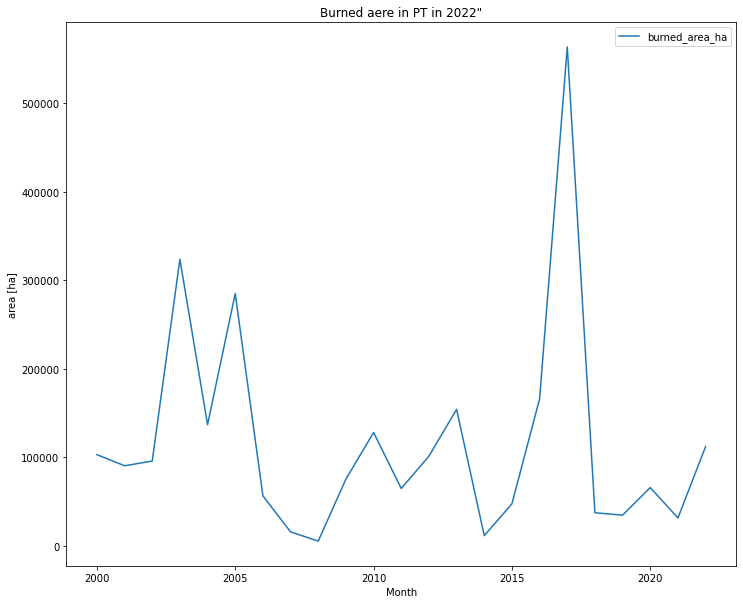

In [20]:
#df_PT=df.where(df.ISO2 == 'PT')
df.plot(x="year", y="burned_area_ha", kind="line",title='Burned aere in PT in 2022"',xlabel="Month",ylabel="area [ha]",figsize=(12, 10))




#df_compare = pd.DataFrame({'speed': speed,'lifespan': lifespan}, index=index


##Reading Gross Dry Matter Productivity (GDMP) 

In [21]:
## Reading AGB and transforming the df into a new schema:
print ("connect to engine......")
engine = sa.create_engine('mssql+pyodbc://' + "GREENMONKEy" + '/' + "Climate_Impact" + '?trusted_connection=yes&driver=ODBC+Driver+13+for+SQL+Server')

print ("connection to greenmonkey found")
print ("Reading AGB table from greenmonkey")
query=('''

SELECT [ADMNUTS2021]
    , ISO2
        ,[CLC0018]
      ,[GridNum10km]
      
      ,ISNULL(sum([AGB2010esacci]),0)  as [01-11-2010]
      ,ISNULL(sum([AGB2017esacci]),0) as [01-11-2017]
      ,ISNULL(sum([AGB2018esacci]),0) as [01-11-2018]
      
  
  FROM [Climate_Impact].[wild_fire].[TEST_F_AGBstock_sum_per_group]
    left join [LUT].[L_adm_eea39_2021LUT] on  [TEST_F_AGBstock_sum_per_group].[ADMNUTS2021] = [L_adm_eea39_2021LUT].[ADM_ID]

where ADMNUTS2021  >= 0
group by 
 [ADMNUTS2021]
    , ISO2
        ,[CLC0018]
      ,[GridNum10km]
''')  
df_AGBstock = pd.read_sql(query, engine)
print(df_AGBstock.head(26))
#pivot 

print ("end AGB .............greenmonkey")

connect to engine......
connection to greenmonkey found
Reading AGB table from greenmonkey
    ADMNUTS2021 ISO2   CLC0018       GridNum10km  01-11-2010  01-11-2017  \
0             1   ES  111111.0  4637147340472320         0.0         0.0   
1             1   ES  111111.0  4637211764981760         0.0         0.0   
2             1   ES  111111.0  4637297664327680         0.0         0.0   
3             1   ES  111111.0  4654254195212288         0.0         0.0   
4             1   ES  111111.0  4654271375081472         0.0         0.0   
5             1   ES  111111.0  4654335799590912         0.0         0.0   
6             1   ES  111111.0  4672185683673088         0.0         0.0   
7             1   ES  111111.0  4672189978640384         0.0         0.0   
8             1   ES  111111.0  4874757816188928         0.0         0.0   
9             1   ES  111111.0  4891190361063424         0.0         0.0   
10            1   ES  111111.0  4891804541386752         0.0         0.0 

In [22]:
#### transform table AGB:

#df_AGBstock
### transform table:
df_transformed_AGB =df_AGBstock.melt(id_vars=["ISO2", "ADMNUTS2021","CLC0018","GridNum10km"], 
     var_name="year", 
        value_name="AGBesacci")



## update date format:
df_transformed_AGB['year'] = pd.to_datetime(df_transformed_AGB['year'], format='%d-%m-%Y')




print ("job done")


job done


In [23]:
df_transformed_AGB

,ISO2,ADMNUTS2021,CLC0018,GridNum10km,year,AGBesacci
0,ES,1,111111.0,4637147340472320,2010-11-01,0.0
1,ES,1,111111.0,4637211764981760,2010-11-01,0.0
2,ES,1,111111.0,4637297664327680,2010-11-01,0.0
3,ES,1,111111.0,4654254195212288,2010-11-01,0.0
4,ES,1,111111.0,4654271375081472,2010-11-01,0.0
...,...,...,...,...,...,...
3209590,SJ,1607,NaN,15028537245302784,2018-11-01,0.0
3209591,SJ,1607,NaN,15028541540270080,2018-11-01,0.0
3209592,SJ,1607,NaN,15028545835237376,2018-11-01,0.0
3209593,SJ,1607,NaN,15028610259746816,2018-11-01,0.0


<AxesSubplot:title={'center':'clc vs agb2018 "'}, xlabel='Month', ylabel='area [ha]'>

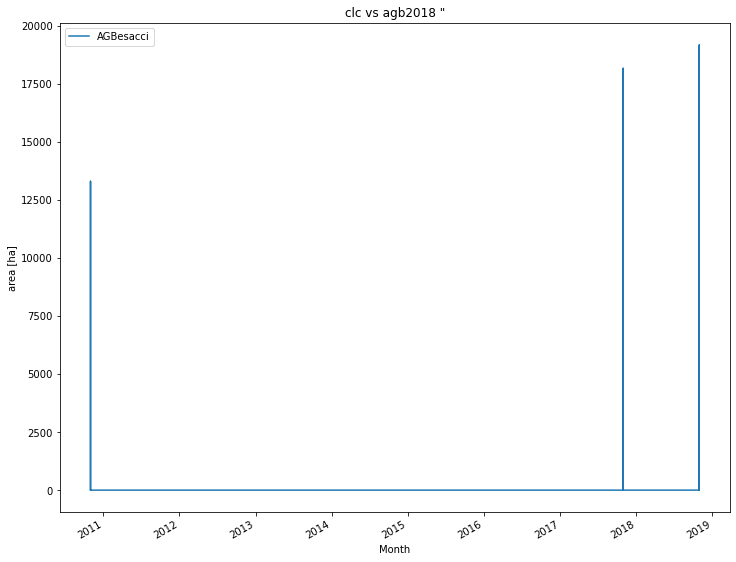

In [31]:
df_agb_PT=df_transformed_AGB.where(df_transformed_AGB.ISO2 == 'PT')
df_agb_PT.plot(x="year", y="AGBesacci", kind="line",title='clc vs agb2018 "',xlabel="Month",ylabel="area [ha]",figsize=(12, 10))


## Bring wildfire and AGB together:


In [25]:
## Reading AGB and transforming the df into a new schema:
print ("connect to engine......")
engine = sa.create_engine('mssql+pyodbc://' + "GREENMONKEY" + '/' + "Climate_Impact" + '?trusted_connection=yes&driver=ODBC+Driver+13+for+SQL+Server')

print ("connection to greenmonkey found")
print ("Reading wilfdire table from greenmonkey")
query=('''

SELECT ISO2,
      [wild_fires_2000_2022_light].[ADM_ID] as ADMNUTS2021
      ,[clc0018] as CLC0018
      ,[GridNum10km]
   
      ,[fire_date]
      ,sum([burned_area]) as [burned_area]
  FROM [Climate_Impact].[wild_fire].[wild_fires_2000_2022_light]
      
    left join [LUT].[L_adm_eea39_2021LUT] on  [wild_fires_2000_2022_light].[ADM_ID] = [L_adm_eea39_2021LUT].[ADM_ID]

where [wild_fires_2000_2022_light].ADM_ID  >= 0
group by 
 [wild_fires_2000_2022_light].[ADM_ID]
    , ISO2
        ,[CLC0018]
      ,[GridNum10km]
	 , [fire_date]
''')  
df_wildfire = pd.read_sql(query, engine)
print(df_wildfire.head(26))
#pivot 

print ("end AGB .............greenmonkey")




connect to engine......
connection to greenmonkey found
Reading wilfdire table from greenmonkey
   ISO2  ADMNUTS2021  CLC0018   GridNum10km  fire_date  burned_area
0    GR            0   243243  2.316899e+16 2012-08-01          139
1    GR            0   311311  2.316899e+16 2012-08-01            3
2    GR            0   311311  2.316906e+16 2022-08-01           11
3    GR            0   311324  2.316899e+16 2012-08-01          275
4    GR            0   313313  2.316899e+16 2012-08-01           25
5    GR            0   313323  2.316899e+16 2012-08-01           53
6    GR            0   313324  2.316892e+16 2012-08-01           11
7    GR            0   313324  2.316899e+16 2012-08-01          981
8    GR            0   323323  2.316892e+16 2022-06-01           73
9    GR            0   323323  2.316899e+16 2012-08-01         1691
10   GR            0   324323  2.316899e+16 2012-08-01         1120
11   GR            0   324324  2.316899e+16 2012-08-01           91
12   PT            3

In [32]:
df_wildfire 



,ISO2,ADMNUTS2021,CLC0018,GridNum10km,fire_date,burned_area
0,GR,0,243243,2.316899e+16,2012-08-01,139
1,GR,0,311311,2.316899e+16,2012-08-01,3
2,GR,0,311311,2.316906e+16,2022-08-01,11
3,GR,0,311324,2.316899e+16,2012-08-01,275
4,GR,0,313313,2.316899e+16,2012-08-01,25
...,...,...,...,...,...,...
163873,ZZ,1604,511511,3.210694e+16,2005-06-01,9
163874,ZZ,1604,511511,3.210708e+16,2004-07-01,24
163875,ZZ,1604,512512,2.322858e+16,2022-03-01,3
163876,ZZ,1604,512512,2.322858e+16,2022-03-01,4


In [36]:
datatypes_AGB = df_transformed_AGB.dtypes 
print (datatypes_AGB)
print ('--------------------')
datatypes_fire = df_wildfire.dtypes 
print (datatypes_fire)

# change data-type to integer:
datatypes_AGB = {'CLC2018': int}
  
# we will change the data type 
# of id column to str by giving
# the dict to the astype method
#df = df.astype(data_types_dict)
  
# checking the data types
# using df.dtypes method
df.dtypes

ISO2                   object
ADMNUTS2021             int64
CLC0018               float64
GridNum10km             int64
year           datetime64[ns]
AGBesacci             float64
dtype: object
--------------------
ISO2                   object
ADMNUTS2021             int64
CLC0018                 int64
GridNum10km           float64
fire_date      datetime64[ns]
burned_area             int64
dtype: object


iso2              object
year               int64
burned_area_ha     int64
dtype: object

In [38]:
df_transformed_AGB

,ISO2,ADMNUTS2021,CLC0018,GridNum10km,year,AGBesacci
0,ES,1,111111.0,4637147340472320,2010-11-01,0.0
1,ES,1,111111.0,4637211764981760,2010-11-01,0.0
2,ES,1,111111.0,4637297664327680,2010-11-01,0.0
3,ES,1,111111.0,4654254195212288,2010-11-01,0.0
4,ES,1,111111.0,4654271375081472,2010-11-01,0.0
...,...,...,...,...,...,...
3209590,SJ,1607,NaN,15028537245302784,2018-11-01,0.0
3209591,SJ,1607,NaN,15028541540270080,2018-11-01,0.0
3209592,SJ,1607,NaN,15028545835237376,2018-11-01,0.0
3209593,SJ,1607,NaN,15028610259746816,2018-11-01,0.0


In [ ]:
# Merge both df :
#https://www.statology.org/left-join-pandas/
#https://stackoverflow.com/questions/41815079/pandas-merge-join-two-data-frames-on-multiple-columns
df1 = df_wildfire        # ISO2	ADMNUTS2021	clc0018	GridNum10km	    fire_date	burned_area
df2 = df_transformed_AGB  #ISO2	ADMNUTS2021	CLC0018	GridNum10km	     year	    AGBesacci


new_df = pd.merge(df1, df2,  left_on=['ISO2','ADMNUTS2021','GridNum10km'], right_on = ['ISO2','ADMNUTS2021','GridNum10km'])

#df12 = df1.merge(df2, on=['ISO2','ADMNUTS2021','GridNum10km'], how='left')

#s1 = pd.merge(df1, df2, how='left', on=['ISO2','ADMNUTS2021','CLC0018','GridNum10km'])


#df12 = pd.merge(s1, df3[['Week', 'Colour', 'Val3']],
#                       how='left', on=['Week', 'Colour'])



In [9]:
### 
import pyodbc 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlalchemy as sa
from sqlalchemy import create_engine, event
from sqlalchemy.engine.url import URL
## Reading AGB and transforming the df into a new schema:
print ("connect to engine......")
engine = sa.create_engine('mssql+pyodbc://' + "GREENMONKEy" + '/' + "Climate_Impact" + '?trusted_connection=yes&driver=ODBC+Driver+13+for+SQL+Server')

print ("connection to greenmonkey found")

### Update of GDMOP to 10km 

print ("start...")
query=('''
        drop table if exists  [Climate_Impact].wild_fire.[F_AGBflux_sum]  
     ''')

engine.execute(query)


print ("done1")


query1=('''
       

        SELECT 

              [GridNum10km]
              ,sum([GDMP_2014_annual_total_INCA_300m_EPSG3035]) as  [01-11-2014]
              ,sum([GDMP_2015_annual_total_INCA_300m_EPSG3035]) as [01-11-2015]
              ,sum([GDMP_2016_annual_total_INCA_300m_EPSG3035]) as [01-11-2016]
              ,sum([GDMP_2017_annual_total_INCA_300m_EPSG3035]) as [01-11-2017]
              ,sum([GDMP_2018_annual_total_INCA_300m_EPSG3035]) as [01-11-2018]
              ,sum([GDMP_2019_annual_total_INCA_300m_EPSG3035]) as [01-11-2019]
              ,sum([GDMP_2020_annual_total_INCA_300m_EPSG3035]) as [01-11-2020]
              ,sum([GDMP_2021_annual_total_INCA_300m_EPSG3035]) as [01-11-2021]

           ,sum([AreaHa]) as AreaHa

         into  [Climate_Impact].wild_fire.[F_AGBflux_sum]

          FROM [Carbon_Mapping].[JEDI_AGBflux].[F_AGBflux]
          group by [GridNum10km]

     ''')
engine.execute(query1)
print ("done2")

connect to engine......
connection to greenmonkey found
start...
done1
done2


In [10]:




## Reading AGB and transforming the df into a new schema:
print ("connect to engine......")
engine = sa.create_engine('mssql+pyodbc://' + "GREENMONKEY" + '/' + "Climate_Impact" + '?trusted_connection=yes&driver=ODBC+Driver+13+for+SQL+Server')

print ("connection to greenmonkey found")
print ("Reading wilfdire table from greenmonkey")
query3=('''

        SELECT *  

     from   
       [Climate_Impact].wild_fire.[F_AGBflux_sum]

        ''')  

df_F_AGBflux_sum = pd.read_sql(query3, engine)
print(df_F_AGBflux_sum.head(26))
#pivot 





connect to engine......
connection to greenmonkey found
Reading wilfdire table from greenmonkey
          GridNum10km   01-11-2014   01-11-2015   01-11-2016   01-11-2017  \
0   22821536360562688          0.0          0.0          0.0          0.0   
1    9860785350115328          0.0          0.0          0.0          0.0   
2   27660980955643904          0.0          0.0          0.0          0.0   
3   18883523796533248          0.0          0.0          0.0          0.0   
4   14521696744636416          0.0          0.0          0.0          0.0   
5    4842545561468928          0.0          0.0          0.0          0.0   
6    5207660731301888          0.0          0.0          0.0          0.0   
7   14657941697200128          0.0          0.0          0.0          0.0   
8    5144713690611712          0.0          0.0          0.0          0.0   
9    9958586050412544          0.0          0.0          0.0          0.0   
10  13814440185036800          0.0          0.0          

In [16]:
df_transformed_AGBflux =df_F_AGBflux_sum.melt(id_vars=["GridNum10km","AreaHa"], 
     var_name="year", 
        value_name="GDMP")



## update date format:
df_transformed_AGBflux['year'] = pd.to_datetime(df_transformed_AGBflux['year'], format='%d-%m-%Y')




In [17]:
df_transformed_AGBflux







,GridNum10km,AreaHa,year,GDMP
0,22821536360562688,10000.0,2014-11-01,0.0
1,9860785350115328,10000.0,2014-11-01,0.0
2,27660980955643904,10000.0,2014-11-01,0.0
3,18883523796533248,9429.0,2014-11-01,0.0
4,14521696744636416,10000.0,2014-11-01,0.0
...,...,...,...,...
2423107,5790028231868416,10000.0,2021-11-01,0.0
2423108,23792826034683904,10000.0,2021-11-01,91207938.0
2423109,28239251057410048,10000.0,2021-11-01,138747785.0
2423110,13943151764963328,10000.0,2021-11-01,0.0
